### Plugins

In [124]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statistics
from collections import Counter

from scipy.spatial.distance import cosine, euclidean
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import colormaps
from matplotlib.cm import get_cmap
from sklearn.linear_model import LinearRegression

from scipy.stats import f_oneway
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

### Load Data


In [2]:
df = pd.read_csv("f1_matrix_w.csv", sep = ",", index_col = "song")
md = pd.read_csv("md.csv", index_col = "Unnamed: 0")
data = pd.read_csv("data.csv", sep = ";", index_col = "Unnamed: 0")
locs = pd.read_csv("locations.csv", index_col = "song")
labs = pd.read_csv("labels.csv", index_col = "song")

### PCA

In [3]:
pca_2c = PCA(n_components = 2)
X_pca_2c = pca_2c.fit_transform(df)

In [4]:
# 66% of variance explained with 2 components
pca_2c.explained_variance_ratio_

array([0.59770773, 0.06087499])

### Data Exploration

In [5]:
x = {i: float(coord[0]) for i, coord in enumerate(X_pca_2c)}
y = {i: float(coord[1]) for i, coord in enumerate(X_pca_2c)}

dict(sorted(x.items(), key=lambda item: item[1], reverse=False))

{1034: -3.9521686771853943,
 1445: -3.9520896918406634,
 1304: -3.95183126338554,
 407: -3.9518154181157987,
 1241: -3.9517158868481284,
 1160: -3.9516590296827085,
 830: -3.951598326640067,
 943: -3.951593233351821,
 337: -3.9515625421803273,
 827: -3.951142222398352,
 917: -3.9506678485639664,
 107: -3.9502807440561982,
 1010: -3.9502360886549095,
 1287: -3.950140994806659,
 642: -3.950025810553222,
 1144: -3.950025810553222,
 1059: -3.949899844384681,
 432: -3.9496086624688744,
 385: -3.949224213340573,
 903: -3.948786567823517,
 1030: -3.948488045442197,
 1049: -3.9484389321125515,
 1353: -3.9481605361534404,
 516: -3.947458700216402,
 700: -3.9473595536541253,
 1047: -3.9469593352723282,
 149: -3.9463077560827036,
 868: -3.9458042621720932,
 240: -3.944732319614135,
 39: -3.943836268425791,
 1208: -3.940691256253183,
 1103: -3.940193462163021,
 237: -3.9399766468427866,
 755: -3.9381723782979274,
 650: -3.935993908497258,
 974: -3.933499776402562,
 777: -3.9323094501542415,
 1011:

In [6]:
# Highest Y-value songs
print(df.columns.values[1194])
print(df.columns.values[173])
print(df.columns.values[178])
print(df.columns.values[181])
print(df.columns.values[228]+"\n")
# Lowest Y-value songs
print(df.columns.values[1201])
print(df.columns.values[1169])
print(df.columns.values[678])
print(df.columns.values[389])
print(df.columns.values[241])

Straight No Chaser
Blue Monk
Blue Sphere
Bluehawk
C-Jam Blues

Strike Up The Band
Soul Eyes
It Could Happen To You
Elora
Catch Me


In [7]:
# Use this cell to find the index of a song.
print(list(df.columns.values).index("500 Miles High"))

3


In [8]:
print("Most unique songs:")
print(f"{df.columns.values[830]}\t{X_pca_2c[830]}")
print(f"{df.columns.values[1241]}\t{X_pca_2c[1241]}")
print(f"{df.columns.values[407]}\t\t{X_pca_2c[407]}")
print(f"{df.columns.values[1304]}\t{X_pca_2c[1304]}")
print(f"{df.columns.values[337]}\t\t{X_pca_2c[337]}")
print("\nLeast unique songs:")
print(f"{df.columns.values[637]}\t{X_pca_2c[637]}")
print(f"{df.columns.values[1389]}\t\t{X_pca_2c[1389]}")
print(f"{df.columns.values[991]}\t\t{X_pca_2c[991]}")
print(f"{df.columns.values[802]}\t{X_pca_2c[802]}")
print(f"{df.columns.values[583]}\t\t{X_pca_2c[583]}")
print("\n3 identical chord progressions for sanity check:")
print(f"{df.columns.values[84]}\t{X_pca_2c[84]}")
print(f"{df.columns.values[1012]}\t{X_pca_2c[1012]}")
print(f"{df.columns.values[973]}\t\t{X_pca_2c[973]}")
print("\nExtreme X and Y songs:")
print(f"X positive: {df.columns.values[1313]}\t{X_pca_2c[1313]}")
print(f"X negative: {df.columns.values[1034]}\t\t\t{X_pca_2c[1034]}")
print(f"Y positive: {df.columns.values[1194]}\t\t{X_pca_2c[1194]}")
print(f"Y negative: {df.columns.values[1201]}\t\t{X_pca_2c[1201]}")

Most unique songs:
Maiden Voyage	[-3.95159833 -0.15351317]
Terra Nova	[-3.95171589 -0.15324038]
Fall		[-3.95181542 -0.15327942]
Toy Tune	[-3.95183126 -0.15329401]
Dienda		[-3.95156254 -0.15308791]

Least unique songs:
If There Is Someone Lovelier	[ 4.95923011 -0.74050066]
Why Do I Love You?		[ 5.62822983 -0.97849414]
One Morning In May		[ 5.3968958  -0.81634833]
Look For The Silver Lining	[ 5.64783868 -0.77756686]
I Want To Be Happy		[5.59417634 0.51082186]

3 identical chord progressions for sanity check:
Anthropology	[3.98310484 1.88885901]
Passport	[3.98310484 1.88885901]
Oleo		[3.98310484 1.88885901]

Extreme X and Y songs:
X positive: Try A Little Tenderness	[ 6.02187265 -0.2887879 ]
X negative: Pinocchio			[-3.95216868 -0.15207051]
Y positive: Straight No Chaser		[-2.37788212  3.53347898]
Y negative: Strike Up The Band		[ 2.96491213 -1.41461144]


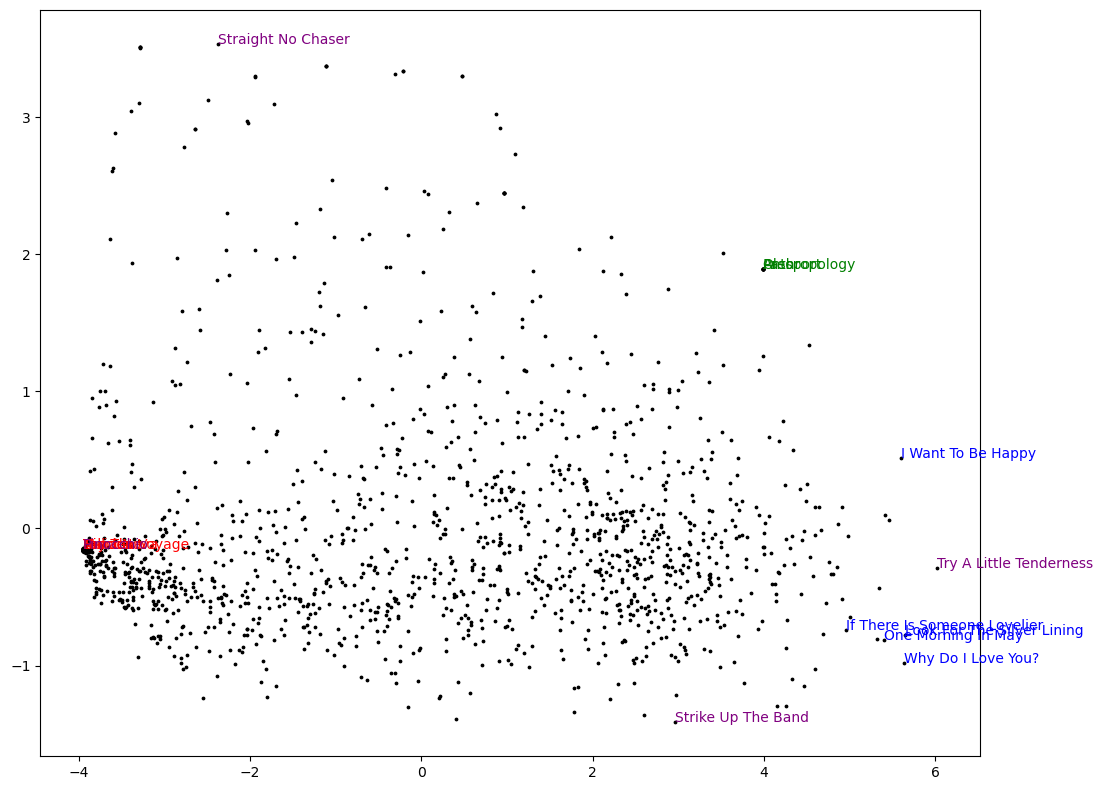

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c = "black", s = 3)
plt.tight_layout()

# Highlighting the location of specific nodes
# Most unique songs
plt.annotate("Maiden Voyage", (X_pca_2c[830, 0], X_pca_2c[830, 1]), c = "red")
plt.annotate("Terra Nova", (X_pca_2c[1241, 0], X_pca_2c[1241, 1]), c = "red")
plt.annotate("Fall", (X_pca_2c[407, 0], X_pca_2c[407, 1]), c = "red")
plt.annotate("Toy Tune", (X_pca_2c[1304, 0], X_pca_2c[1304, 1]), c = "red")
plt.annotate("Dienda", (X_pca_2c[337, 0], X_pca_2c[337, 1]), c = "red")

# Least unique songs
plt.annotate("If There Is Someone Lovelier", (X_pca_2c[637, 0], X_pca_2c[637, 1]), c = "blue")
plt.annotate("Why Do I Love You?", (X_pca_2c[1389, 0], X_pca_2c[1389, 1]), c = "blue")
plt.annotate("One Morning In May", (X_pca_2c[991, 0], X_pca_2c[991, 1]), c = "blue")
plt.annotate("Look For The Silver Lining", (X_pca_2c[802, 0], X_pca_2c[802, 1]), c = "blue")
plt.annotate("I Want To Be Happy", (X_pca_2c[583, 0], X_pca_2c[583, 1]), c = "blue")

# Sanity check with 3 songs known to have identical chord progressions
plt.annotate("Anthropology", (X_pca_2c[84, 0], X_pca_2c[84, 1]), c = "green")
plt.annotate("Passport", (X_pca_2c[1012, 0], X_pca_2c[1012, 1]), c = "green")
plt.annotate("Oleo", (X_pca_2c[973, 0], X_pca_2c[973, 1]), c = "green")

# Extreme X and Y values
plt.annotate("Try A Little Tenderness", (X_pca_2c[1313, 0], X_pca_2c[1313, 1]), c = "purple")
plt.annotate("Pinocchio", (X_pca_2c[1034, 0], X_pca_2c[1034, 1]), c = "purple")
plt.annotate("Straight No Chaser", (X_pca_2c[1194, 0], X_pca_2c[1194, 1]), c = "purple")
plt.annotate("Strike Up The Band", (X_pca_2c[1201, 0], X_pca_2c[1201, 1]), c = "purple")

#plt.savefig("figures/pca2.png", bbox_inches='tight')
plt.show()

### Regularity

In [10]:
cosine_dict = {}

for song1 in df.columns:
    cos = []
    for song2 in df.columns:
        cos.append(float(cosine(df[song1], df[song2])))

    cosine_dict[song1] = (1 - sum(cos)/1446)

In [11]:
cosine_dict
dict(sorted(cosine_dict.items(), key=lambda item: item[1], reverse=False))

{'Maiden Voyage': 0.000975425143318831,
 'Fall': 0.0009779767509976445,
 'Toy Tune': 0.0010397039704552746,
 'Terra Nova': 0.001051148289262116,
 'Dienda': 0.001195636303752634,
 'Nicolette': 0.0013056013138429412,
 'Ma Belle Hélène': 0.001915718476707129,
 'Pinocchio': 0.002691757549042495,
 'Re: Person I Knew': 0.0032431777858488164,
 'Backward Step, The': 0.0034208824093114876,
 'Mr. Day': 0.003641057452086316,
 "My Man's Gone Now": 0.004124698666483129,
 'Watermelon Man': 0.005056729381713088,
 'Big Push, The': 0.005682491494097053,
 'Punjab': 0.005792314915860741,
 'Hindsight': 0.006238468404704989,
 'Time Remembered': 0.006485565446294417,
 'Impressions': 0.007671793436536567,
 'So What': 0.007671793436536567,
 'Jackie-ing': 0.007757521068411322,
 'Footprints': 0.008073489973932868,
 'Passion Dance': 0.00864643177534763,
 'Song For Bilbao': 0.009018402872351672,
 'Phase Dance': 0.009074954838255822,
 'Eighty One': 0.009302318489548322,
 'Pursuance': 0.009392864959774982,
 'Minori

In [12]:
summative_dict = {song: sum(df[song]/1446) for song in df.columns}
dict(sorted(summative_dict.items(), key=lambda item: item[1], reverse=True))

{'Try A Little Tenderness': 0.2155727590424614,
 'Why Do I Love You?': 0.20497096937630416,
 'Look For The Silver Lining': 0.20431504348464344,
 'I Want To Be Happy': 0.2035191887741532,
 "Rockin' Chair": 0.2031409991310931,
 'One Morning In May': 0.20267833681890496,
 'Oh, Lady Be Good': 0.2008490021972037,
 'If There Is Someone Lovelier': 0.20050038441659296,
 "What'll I Do": 0.19750675703597967,
 'I May Be Wrong': 0.1955027711872925,
 'In Love In Vain': 0.19386680318852517,
 "I'll Close My Eyes": 0.19222591490455085,
 'I Like The Likes Of You': 0.19202829490464998,
 'Moonlight Becomes You': 0.1917313514297392,
 'There Will Never Be Another You': 0.19130902597881955,
 'Love Walked In': 0.1900599614131852,
 'Things We Did Last Summer, The': 0.1897575215132733,
 'Lady is a Tramp, The': 0.18900023329819057,
 'Where Are You?': 0.1887598577608019,
 'Masquerade Is Over, The': 0.18669634370220156,
 'Misty': 0.18632893435606285,
 'For Sentimental Reasons': 0.1856828366347239,
 'September In 

### Clustering by Time Period

#### Correlation between year and regularity

In [13]:
year_d = {md["song"][i]: int(md["y"][i]) for i in md.index.to_list()}
regularity_year = {}
for song in year_d.keys():
    regularity_year[sum(df[song])/1446] = year_d[song]

In [14]:
# Linear regression
model = LinearRegression()

y = np.array(list(regularity_year.keys()))
X = np.array(list(regularity_year.values())).reshape(-1, 1)

model.fit(X, y)

LinearRegression()

In [15]:
# Getting the metrics
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

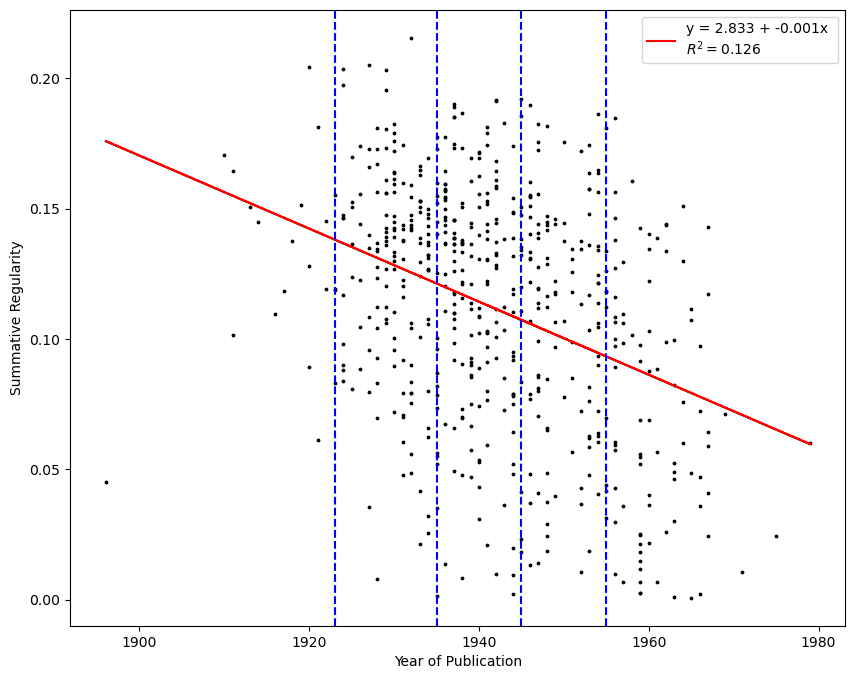

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c = "black", s = 3)
plt.plot(X, model.predict(X), color = "red", label = f"y = {intercept:.3f} + {slope:.3f}x \n$R^2 = {r_squared:.3f}$")

plt.legend(loc = "upper right")
plt.xlabel("Year of Publication")
plt.ylabel("Summative Regularity")

plt.axvline(x = 1923, color = "blue", linestyle = "--")
plt.axvline(x = 1935, color = "blue", linestyle = "--")
plt.axvline(x = 1945, color = "blue", linestyle = "--")
plt.axvline(x = 1955, color = "blue", linestyle = "--")

plt.savefig("figures/YearxRegularity.png", bbox_inches='tight')
plt.show()

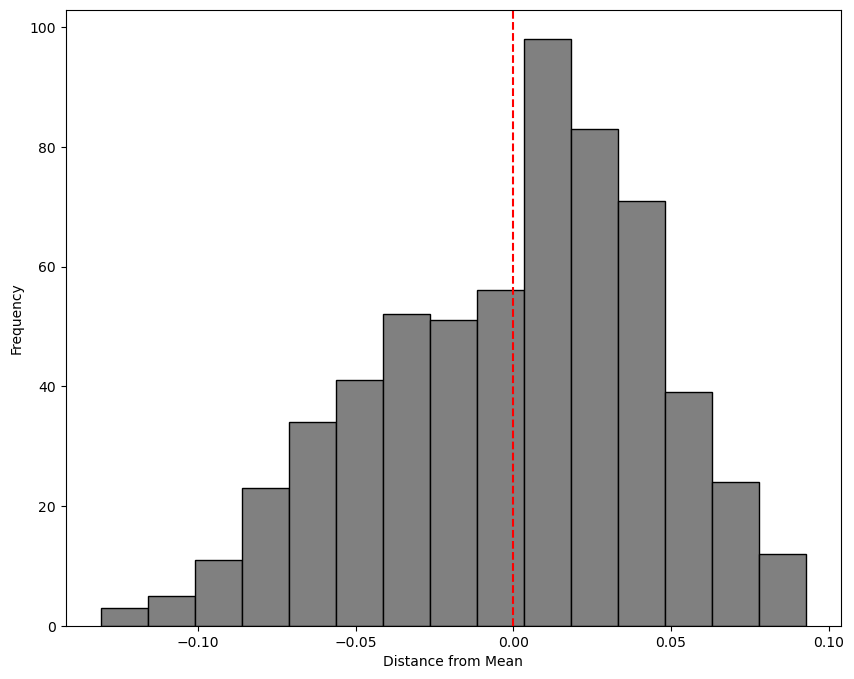

In [17]:
# Residual distribution
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 8))

plt.hist(residuals, bins = 15, color = "grey", edgecolor = "black")
plt.axvline(x = 0, color = "red", linestyle = "--")
plt.xlabel("Distance from Mean")
plt.ylabel("Frequency")
plt.savefig("figures/YearxRegularityResidualDist.png", bbox_inches='tight')
plt.show()

#### Correlation between year and cosine distance

In [18]:
year_d = {md["song"][i]: int(md["y"][i]) for i in md.index.to_list()}
cosine_year = {}
for song in year_d.keys():
    cosine_year[cosine_dict[song]] = year_d[song]

In [19]:
# Linear regression
y = np.array(list(cosine_year.keys()))
X = np.array(list(cosine_year.values())).reshape(-1, 1)

model.fit(X, y)

LinearRegression()

In [20]:
# Getting the metrics
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

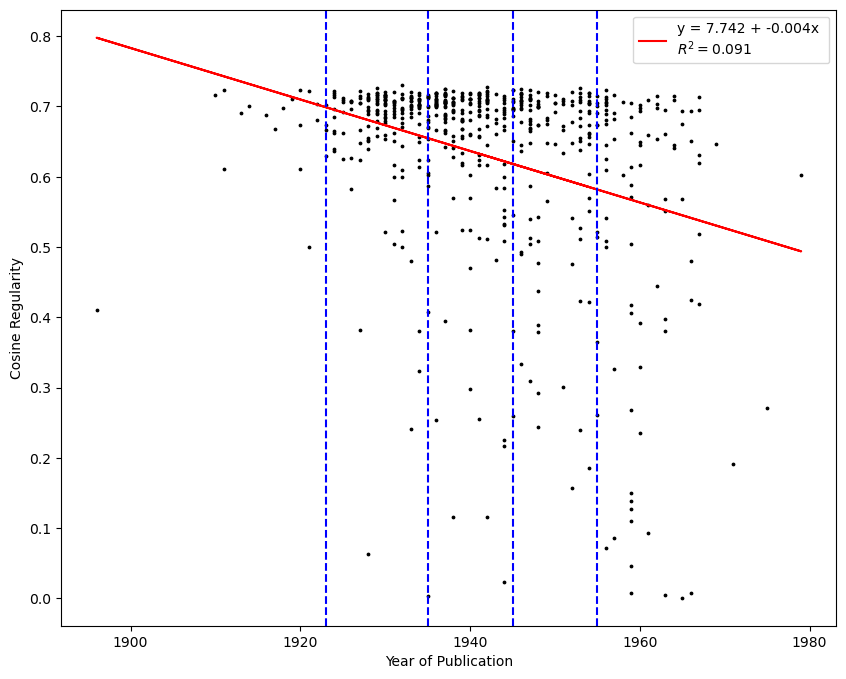

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c = "black", s = 3)
plt.plot(X, model.predict(X), color = "red", label = f"y = {intercept:.3f} + {slope:.3f}x \n$R^2 = {r_squared:.3f}$")

plt.legend(loc = "upper right")
plt.xlabel("Year of Publication")
plt.ylabel("Cosine Regularity")

plt.axvline(x = 1923, color = "blue", linestyle = "--")
plt.axvline(x = 1935, color = "blue", linestyle = "--")
plt.axvline(x = 1945, color = "blue", linestyle = "--")
plt.axvline(x = 1955, color = "blue", linestyle = "--")

plt.savefig("figures/YearxCosine.png", bbox_inches='tight')
plt.show()

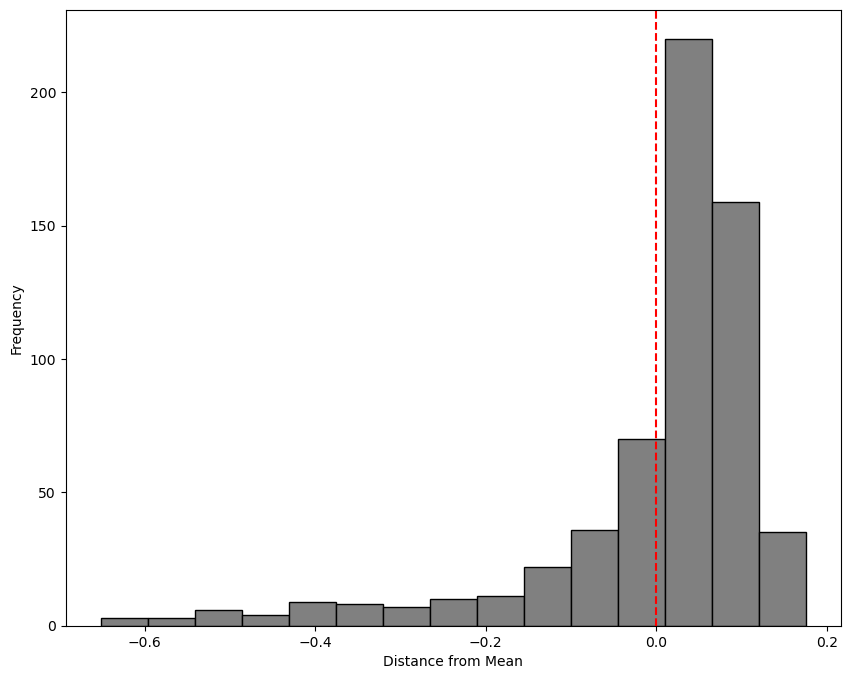

In [22]:
# Residual distribution
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 8))

plt.hist(residuals, bins = 15, color = "grey", edgecolor = "black")
plt.axvline(x = 0, color = "red", linestyle = "--")
plt.xlabel("Distance from Mean")
plt.ylabel("Frequency")
plt.savefig("figures/YearxCosineResidualDist.png", bbox_inches='tight')
plt.show()

#### Using PCA

In [23]:
# Mapping periods to points
year_p = {}
for s, y in year_d.items():
    if y < 1923:
        year_p[s] = "New Orleans Era"
    if y >= 1923 and y < 1935:
        year_p[s] = "Jazz Era"
    if y >= 1935 and y < 1945:
        year_p[s] = "Swing Era"
    if y >= 1945 and y < 1955:
        year_p[s] = "Bebop Era"
    if y >= 1955:
        year_p[s] = "Pluralistic Era"

c_indeces = {list(df.columns.values).index(song): age for song, age in year_p.items()}
c_indeces

labels = np.array(list(c_indeces.values()))
unique_labels = np.unique(labels)

In [24]:
list(year_p.values()).count("Pluralistic Era")

100

In [25]:
# Subselection of only mapped points
pca_subset_periods = [tuple(X_pca_2c[i]) for i in c_indeces.keys()]
pca_subset_periods = np.array(pca_subset_periods)

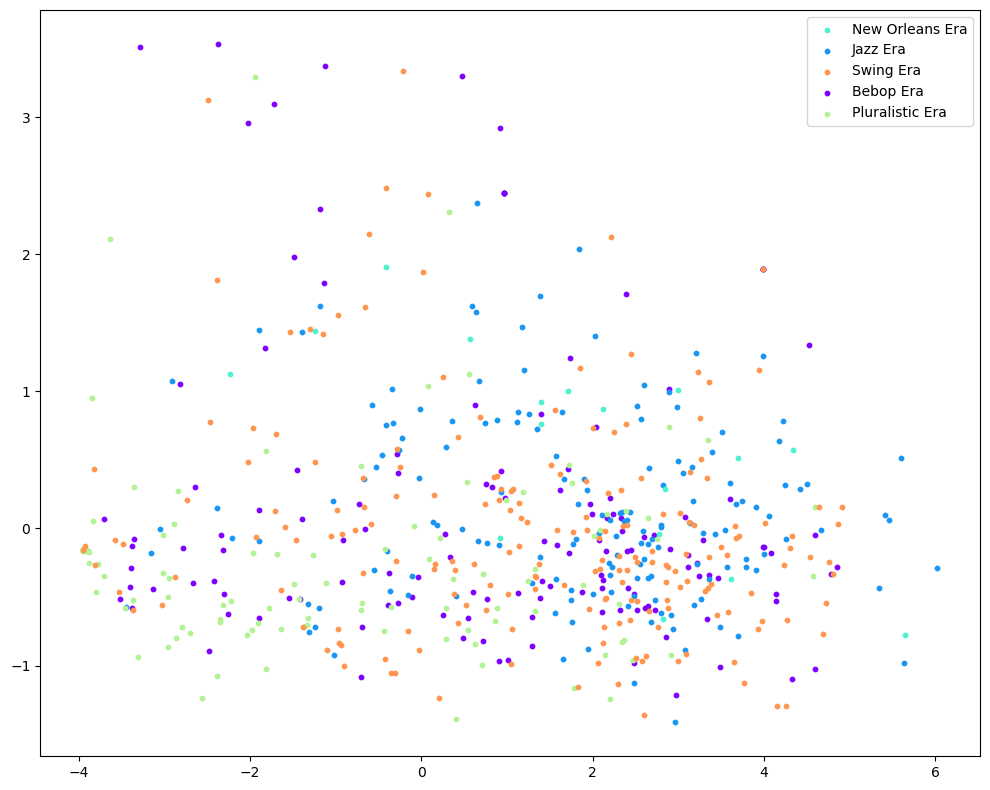

In [26]:
plt.figure(figsize=(10, 8))

colors = [plt.colormaps["rainbow"](i / len(unique_labels)) for i in range(len(unique_labels))]
markers = ['o', 's', '^', '+', 'o', 's', '^', '+', 'o', 's', '^', '+', 'o', 's']

for i, label in enumerate(unique_labels):
    idx = labels == label
    plt.scatter(pca_subset_periods[idx, 0], pca_subset_periods[idx, 1], s=10, color=colors[i], label=str(label))

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 4, 0, 3]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

plt.tight_layout()
plt.savefig("figures/pca_ages.png", bbox_inches='tight')
plt.show()

### Clustering by artist

In [27]:
composers = list(data["composer"])

topcomposers = {i: c for i, c in enumerate(composers) if composers.count(c) >= 20}

songandcomposer = {}
for i, song in enumerate(list(data["song"])):
    if composers[i] in topcomposers.values():
        songandcomposer[song] = composers[i]

compandreg = {sum(df[s]) / 1446: c for s, c in songandcomposer.items()}
cosandcomp = {cosine_dict[s]: c for s, c in songandcomposer.items()}

#### Regularity Tests

In [28]:
composerdf = pd.DataFrame({"composer":compandreg.values(), "song_score":compandreg.keys()})
groups = composerdf.groupby("composer").groups

arlen = [composerdf.loc[i].at["song_score"] for i in groups["Arlen Harold"]]
berlin = [composerdf.loc[i].at["song_score"] for i in groups["Berlin Irving"]]
coltrane = [composerdf.loc[i].at["song_score"] for i in groups["Coltrane John"]]
ellington = [composerdf.loc[i].at["song_score"] for i in groups["Ellington Duke"]]
gershwin = [composerdf.loc[i].at["song_score"] for i in groups["Gershwin George"]]
jobim = [composerdf.loc[i].at["song_score"] for i in groups["Jobim Antonio-Carlos"]]
kern = [composerdf.loc[i].at["song_score"] for i in groups["Kern Jerome"]]
metheny = [composerdf.loc[i].at["song_score"] for i in groups["Metheny Pat"]]
monk = [composerdf.loc[i].at["song_score"] for i in groups["Monk Thelonious"]]
parker = [composerdf.loc[i].at["song_score"] for i in groups["Parker Charlie"]]
porter = [composerdf.loc[i].at["song_score"] for i in groups["Porter Cole"]]
rodgers = [composerdf.loc[i].at["song_score"] for i in groups["Rodgers Richard"]]
shorter = [composerdf.loc[i].at["song_score"] for i in groups["Shorter Wayne"]]
silver = [composerdf.loc[i].at["song_score"] for i in groups["Silver Horace"]]

print(f_oneway(arlen, berlin, coltrane, ellington, gershwin, jobim, kern, metheny, monk, parker, porter, rodgers, shorter, silver))
print(kruskal(arlen, berlin, coltrane, ellington, gershwin, jobim, kern, metheny, monk, parker, porter, rodgers, shorter, silver))

F_onewayResult(statistic=np.float64(41.929101255110744), pvalue=np.float64(2.3126526500566462e-66))
KruskalResult(statistic=np.float64(236.90671321792342), pvalue=np.float64(3.3274871119044197e-43))


In [29]:
# Dunn's post-test:
composer_dunn = posthoc_dunn(composerdf, "song_score", "composer", "bonferroni")
composer_dunn.to_csv("composer_dunn.csv")
composer_dunn.head()

,Arlen Harold,Berlin Irving,Coltrane John,Ellington Duke,Gershwin George,Jobim Antonio-Carlos,Kern Jerome,Metheny Pat,Monk Thelonious,Parker Charlie,Porter Cole,Rodgers Richard,Shorter Wayne,Silver Horace
Arlen Harold,1.000000,1.000000,0.000125,1.000000,1.000000,0.038768,1.000000,8.349867e-10,0.000023,1.00000,1.000000,1.000000e+00,2.501310e-11,0.000032
Berlin Irving,1.000000,1.000000,0.000318,1.000000,1.000000,0.098968,1.000000,1.535601e-09,0.000052,1.00000,1.000000,1.000000e+00,2.847605e-11,0.000077
Coltrane John,0.000125,0.000318,1.000000,0.145366,0.000283,1.000000,0.000198,1.000000e+00,1.000000,0.00005,0.048139,1.153945e-08,1.000000e+00,1.000000
Ellington Duke,1.000000,1.000000,0.145366,1.000000,1.000000,1.000000,1.000000,1.255191e-05,0.079981,1.00000,1.000000,3.525247e-01,1.836706e-06,0.059301
Gershwin George,1.000000,1.000000,0.000283,1.000000,1.000000,0.109604,1.000000,8.597223e-10,0.000036,1.00000,1.000000,1.000000e+00,9.084287e-12,0.000064


In [30]:
composer_order = (composerdf.groupby('composer')['song_score'].mean().sort_values(ascending=False).index)

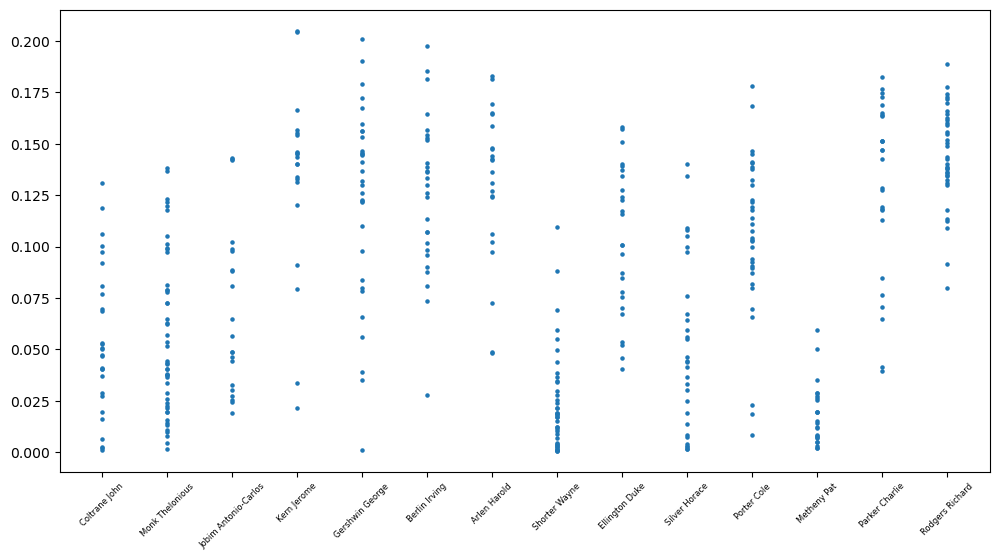

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(composerdf["composer"], composerdf["song_score"], s = 5)
plt.xticks(rotation=45, fontsize=6)
plt.show()

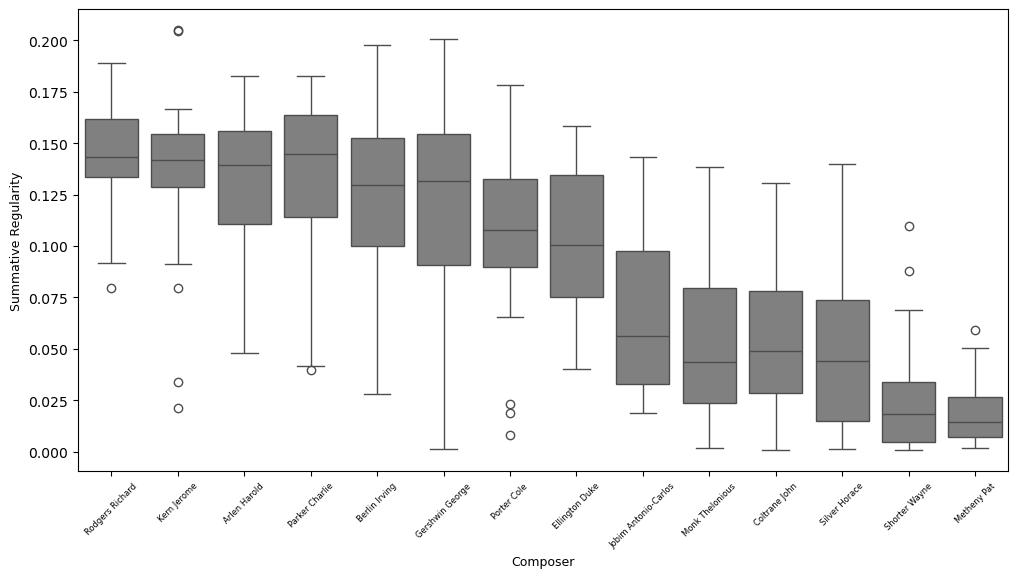

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=composerdf, x='composer', y='song_score', color = "grey", order=composer_order)

plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Summative Regularity', fontsize=9)
plt.xlabel('Composer', fontsize=9)

plt.savefig("figures/boxplot_composers.png", bbox_inches='tight', dpi=300)
plt.show()

#### Cosine tests

In [33]:
cos_composerdf = pd.DataFrame({"composer":cosandcomp.values(), "song_score":cosandcomp.keys()})
cos_groups = cos_composerdf.groupby("composer").groups

arlen = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Arlen Harold"]]
berlin = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Berlin Irving"]]
coltrane = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Coltrane John"]]
ellington = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Ellington Duke"]]
gershwin = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Gershwin George"]]
jobim = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Jobim Antonio-Carlos"]]
kern = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Kern Jerome"]]
metheny = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Metheny Pat"]]
monk = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Monk Thelonious"]]
parker = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Parker Charlie"]]
porter = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Porter Cole"]]
rodgers = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Rodgers Richard"]]
shorter = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Shorter Wayne"]]
silver = [cos_composerdf.loc[i].at["song_score"] for i in cos_groups["Silver Horace"]]

print(f_oneway(arlen, berlin, coltrane, ellington, gershwin, jobim, kern, metheny, monk, parker, porter, rodgers, shorter, silver))
print(kruskal(arlen, berlin, coltrane, ellington, gershwin, jobim, kern, metheny, monk, parker, porter, rodgers, shorter, silver))

F_onewayResult(statistic=np.float64(25.435299309029006), pvalue=np.float64(1.215433481353349e-44))
KruskalResult(statistic=np.float64(220.58215920054477), pvalue=np.float64(7.905844149089401e-40))


In [34]:
# Dunn's post-test:
cos_composer_dunn = posthoc_dunn(cos_composerdf, "song_score", "composer", "bonferroni")
cos_composer_dunn.to_csv("cos_composer_dunn.csv")
cos_composer_dunn.head()

,Arlen Harold,Berlin Irving,Coltrane John,Ellington Duke,Gershwin George,Jobim Antonio-Carlos,Kern Jerome,Metheny Pat,Monk Thelonious,Parker Charlie,Porter Cole,Rodgers Richard,Shorter Wayne,Silver Horace
Arlen Harold,1.000000,1.000000,0.000008,1.000000,1.000000,0.061490,1.000000,5.183724e-09,0.000012,1.000000,1.000000,1.000000e+00,1.816298e-10,0.000042
Berlin Irving,1.000000,1.000000,0.000007,1.000000,1.000000,0.085487,1.000000,3.111877e-09,0.000008,1.000000,1.000000,1.000000e+00,5.456729e-11,0.000040
Coltrane John,0.000008,0.000007,1.000000,0.058497,0.000004,1.000000,0.000043,1.000000e+00,1.000000,0.013091,0.000789,4.823782e-10,1.000000e+00,1.000000
Ellington Duke,1.000000,1.000000,0.058497,1.000000,1.000000,1.000000,1.000000,2.157850e-04,0.153269,1.000000,1.000000,1.957765e-01,4.692316e-05,0.198679
Gershwin George,1.000000,1.000000,0.000004,1.000000,1.000000,0.075969,1.000000,1.164140e-09,0.000003,1.000000,1.000000,1.000000e+00,1.054425e-11,0.000022


In [35]:
cos_composer_order = (cos_composerdf.groupby('composer')['song_score'].mean().sort_values(ascending=False).index)

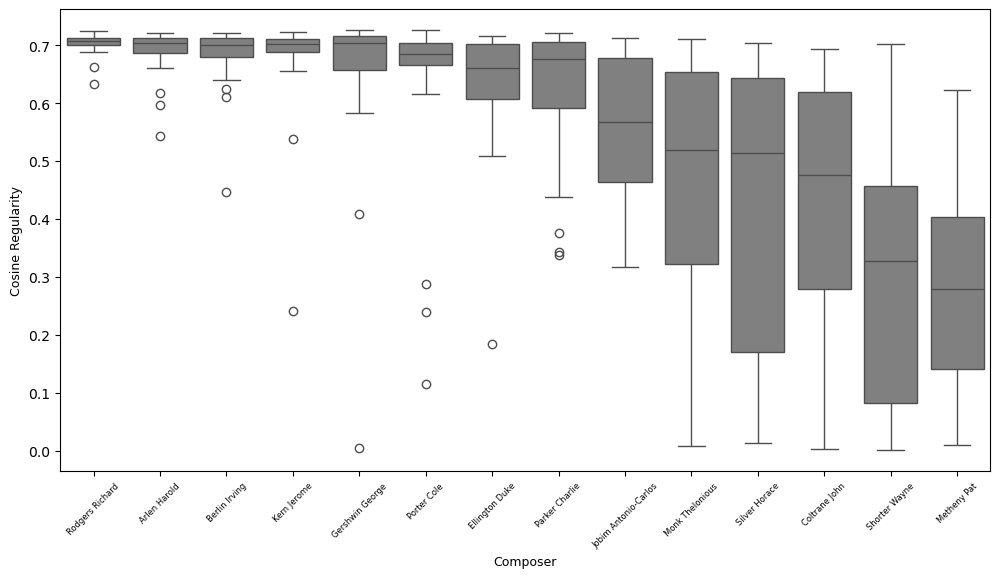

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cos_composerdf, x='composer', y='song_score', color = "grey", order=cos_composer_order)

plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Cosine Regularity', fontsize=9)
plt.xlabel('Composer', fontsize=9)

plt.savefig("figures/boxplot_composers_cosine.png", bbox_inches='tight', dpi=300)
plt.show()

#### Composer PCA

In [37]:
# Subselection of only mapped points
pca_subset_composers = [tuple(X_pca_2c[i]) for i in topcomposers.keys()]
pca_subset_composers = np.array(pca_subset_composers)

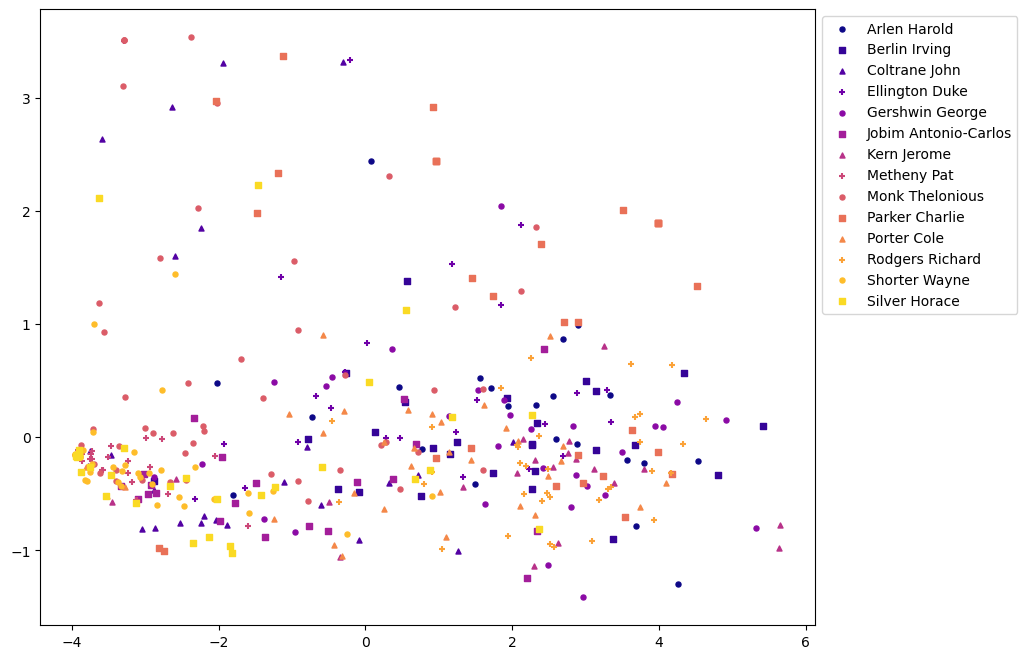

In [38]:
labels2 = np.array(list(topcomposers.values()))
unique_labels2 = np.unique(labels2)

plt.figure(figsize=(10, 8))

colors2 = [plt.colormaps["plasma"](i / len(unique_labels2)) for i in range(len(unique_labels2))]
markers = ['o', 's', '^', '+', 'o', 's', '^', '+', 'o', 's', '^', '+', 'o', 's']

for i, label in enumerate(unique_labels2):
    idx = labels2 == label
    plt.scatter(pca_subset_composers[idx, 0], pca_subset_composers[idx, 1], s=13, color=colors2[i], marker=markers[i], label=str(label))

handles, labels2 = plt.gca().get_legend_handles_labels()
order = range(14)
plt.legend([handles[i] for i in order], [labels2[i] for i in order], bbox_to_anchor=(1, 1))

plt.savefig("figures/pca_composers.png", bbox_inches='tight', dpi=300)
plt.show()

In [39]:
labels_test = []
for c in list(topcomposers.values()):
    if c in list(composer_order)[-6:]:
        labels_test.append("Post-Classical")
    elif c == "Parker Charlie":
        labels_test.append("Charlie Parker")
    else:
        labels_test.append("Classical")

labels_test = np.array(labels_test)
unique_labels_test = np.unique(labels_test)

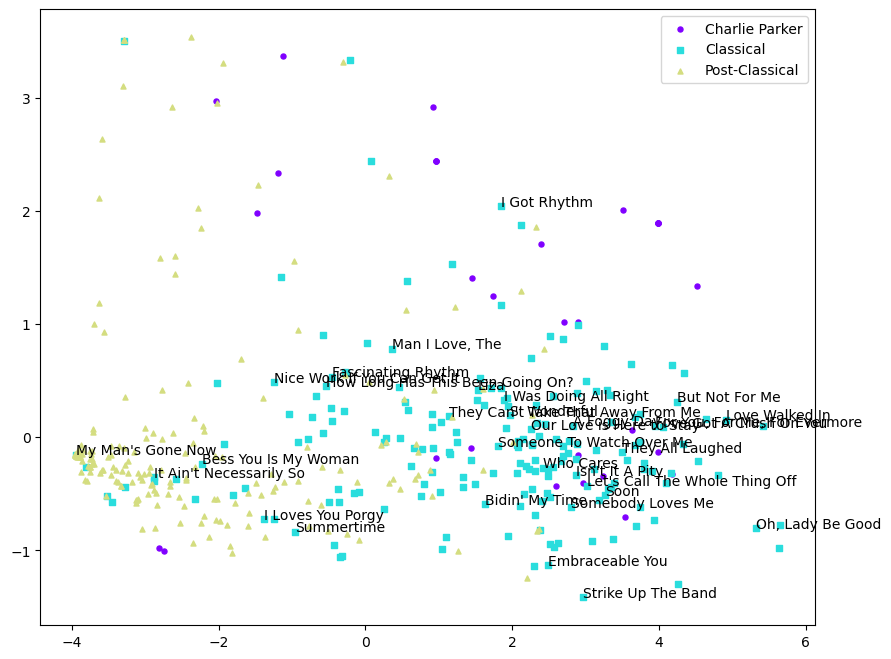

In [40]:
plt.figure(figsize=(10, 8))

#plt.scatter(pca_subset_composers[:,0], pca_subset_composers[:,1], c = "black", s = 3)
colors2 = [plt.colormaps["rainbow"](i / len(unique_labels_test)) for i in range(len(unique_labels_test))]

for i, label in enumerate(unique_labels_test):
    idx = labels_test == label
    plt.scatter(pca_subset_composers[idx, 0], pca_subset_composers[idx, 1], s=13, color=colors2[i], marker=markers[i], label=str(label))

handles, labels_test = plt.gca().get_legend_handles_labels()
order = range(3)
plt.legend([handles[i] for i in order], [labels_test[i] for i in order], bbox_to_anchor=(1, 1))

for i, c in topcomposers.items():
    if c == "Gershwin George":
        plt.annotate(list(data["song"])[i], (X_pca_2c[i, 0], X_pca_2c[i, 1]))

#plt.savefig("figures/pca_composers2.png", bbox_inches='tight', dpi=300)
plt.show()

### Clustering by location

#### Location summative regularity

In [41]:
# Fixing the indeces of the locs df
loc_indeces = []
for song in locs["song_original"]:
    i = data["song"][data["song"] == song].index[0]
    loc_indeces.append(int(i))

locs["index"] = loc_indeces
locs.set_index("index", inplace = True)

locs = locs[locs["location"] != "IL"]
#locs = locs[locs["location"] != "Greenwich Village"]

index_location = locs["location"].to_dict()

In [42]:
Counter(list(index_location.values()))

Counter({'NY': 180, 'NJ': 103, 'CA': 37})

In [43]:
locandreg = {}
for i, l in index_location.items():
    locandreg[sum(df[data["song"][i]]) / 1446] = l

In [44]:
locationdf = pd.DataFrame({"location":locandreg.values(), "song_score":locandreg.keys()})
groups = locationdf.groupby("location").groups

NY = [locationdf.loc[i].at["song_score"] for i in groups["NY"]]
NJ = [locationdf.loc[i].at["song_score"] for i in groups["NJ"]]
CA = [locationdf.loc[i].at["song_score"] for i in groups["CA"]]
#IL = [locationdf.loc[i].at["song_score"] for i in groups["IL"]]


print(f_oneway(NY, NJ, CA))
print(kruskal(NY, NJ, CA))

F_onewayResult(statistic=np.float64(2.434661858129124), pvalue=np.float64(0.08933436950406048))
KruskalResult(statistic=np.float64(6.3160186038786605), pvalue=np.float64(0.04251028204084692))


In [45]:
location_order = (locationdf.groupby('location')['song_score'].mean().sort_values(ascending=False).index)

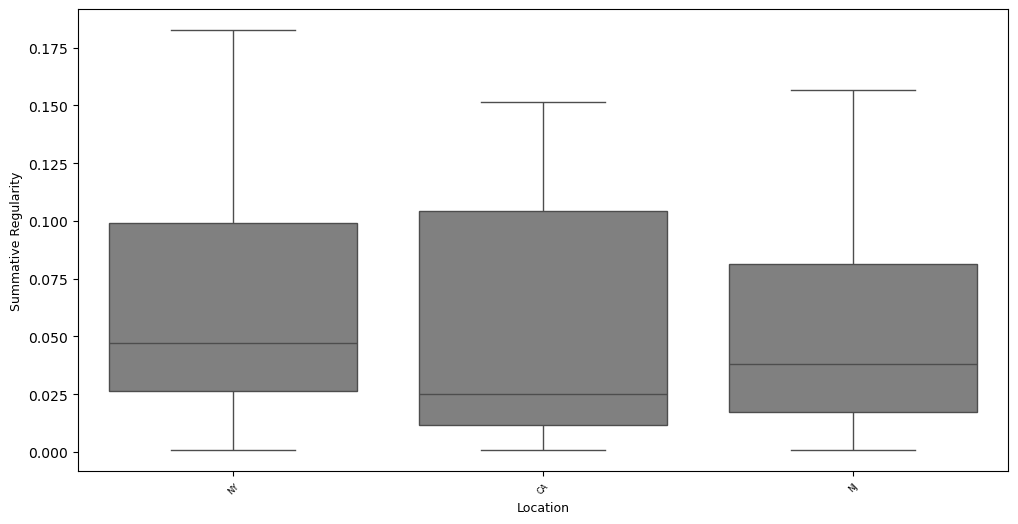

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=locationdf, x='location', y='song_score', color = "grey", order=location_order)

plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Summative Regularity', fontsize=9)
plt.xlabel('Location', fontsize=9)

plt.savefig("figures/boxplot_location.png", bbox_inches='tight', dpi=300)
plt.show()

#### Location cosine regularity

In [47]:
locandcos = {}
for i, l in index_location.items():
    locandcos[list(cosine_dict.values())[i]] = l

In [48]:
cos_locationdf = pd.DataFrame({"location":locandcos.values(), "song_score":locandcos.keys()})
groups = cos_locationdf.groupby("location").groups

NY = [cos_locationdf.loc[i].at["song_score"] for i in groups["NY"]]
NJ = [cos_locationdf.loc[i].at["song_score"] for i in groups["NJ"]]
CA = [cos_locationdf.loc[i].at["song_score"] for i in groups["CA"]]
#IL = [locationdf.loc[i].at["song_score"] for i in groups["IL"]]


print(f_oneway(NY, NJ, CA))
print(kruskal(NY, NJ, CA))

F_onewayResult(statistic=np.float64(0.7279452744853766), pvalue=np.float64(0.4837211372360759))
KruskalResult(statistic=np.float64(2.0954136956520415), pvalue=np.float64(0.3507411304070181))


In [49]:
location_order = (cos_locationdf.groupby('location')['song_score'].mean().sort_values(ascending=False).index)

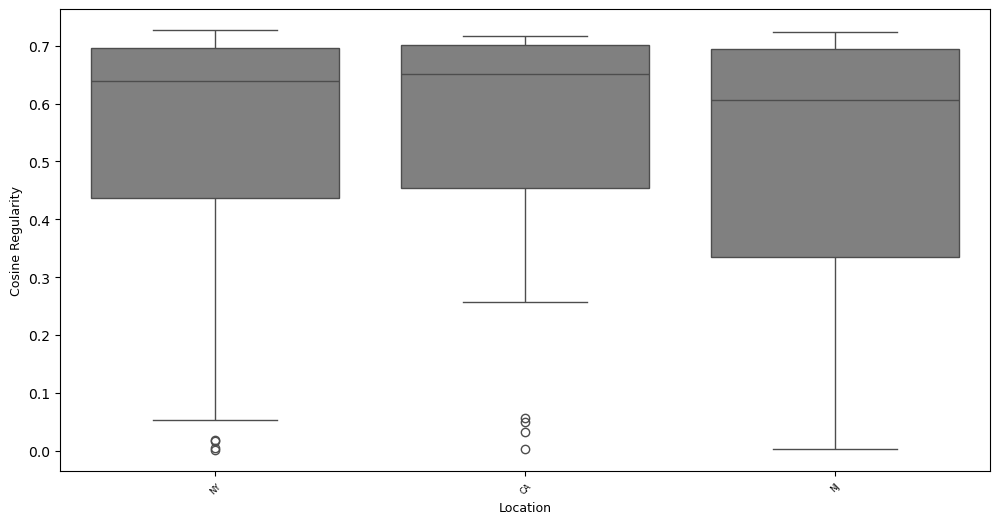

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cos_locationdf, x='location', y='song_score', color = "grey", order=location_order)

plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Cosine Regularity', fontsize=9)
plt.xlabel('Location', fontsize=9)

plt.savefig("figures/boxplot_location_cos.png", bbox_inches='tight', dpi=300)
plt.show()

In [51]:
cos_loc_dunn = posthoc_dunn(cos_locationdf, "song_score", "location", "bonferroni")
cos_loc_dunn.head()

,CA,NJ,NY
CA,1.000000,0.885274,1.000000
NJ,0.885274,1.000000,0.544143
NY,1.000000,0.544143,1.000000


#### Location PCA

In [52]:
# Subselection of only mapped points
pca_subset_locations = [tuple(X_pca_2c[i]) for i in index_location.keys()]
pca_subset_locations = np.array(pca_subset_locations)

In [53]:
labels3 = np.array(list(index_location.values()))
unique_labels3 = np.unique(labels3)

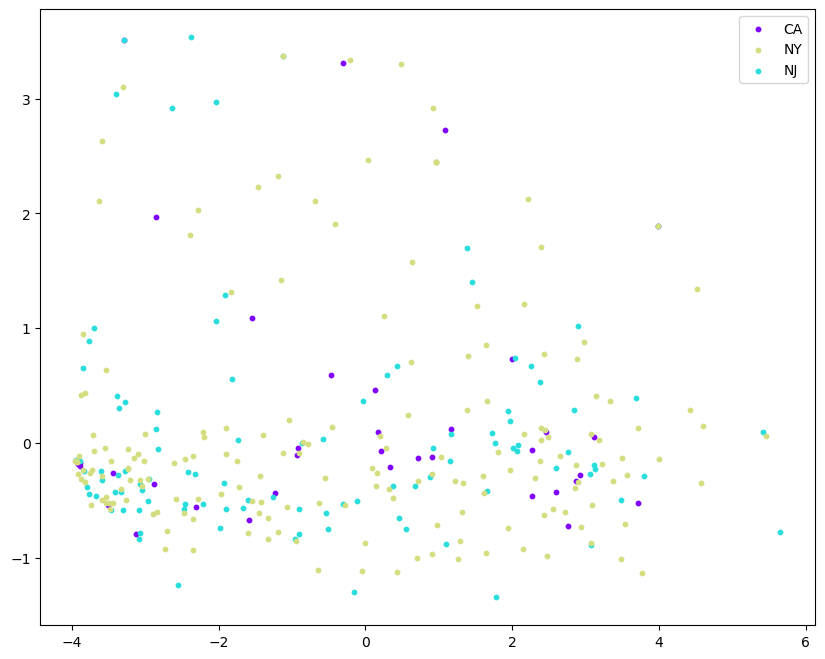

In [54]:
plt.figure(figsize=(10, 8))

colors3= [plt.colormaps["rainbow"](i / len(unique_labels3)) for i in range(len(unique_labels3))]

for i, label in enumerate(unique_labels3):
    idx = labels3 == label
    plt.scatter(pca_subset_locations[idx, 0], pca_subset_locations[idx, 1], s=10, color=colors3[i], label=str(label))

handles, labels3 = plt.gca().get_legend_handles_labels()
order = [0, 2, 1]
plt.legend([handles[i] for i in order], [labels3[i] for i in order], bbox_to_anchor=(1, 1))

plt.savefig("figures/pca_location.png", bbox_inches='tight', dpi=300)
plt.show()

### Clustering by Label

In [55]:
# Fixing the indeces of the labels df
lab_indeces = []
for song in labs["song_original"]:
    i = data["song"][data["song"] == song].index[0]
    lab_indeces.append(int(i))

labs["index"] = lab_indeces
labs.set_index("index", inplace = True)

exclude_labels = [
    "Fantasy", "Contemporary", "Dial", "CTI", "Warner Bros",
    "Pacific", "Capitol", "Mercury", "Impulse!", "Verve", "Savoy"
]

labs = labs[~labs["label"].isin(exclude_labels)]

index_label = labs["label"].to_dict()

In [56]:
Counter(list(index_label.values()))

Counter({'Blue Note': 101,
         'Prestige': 29,
         'Columbia': 22,
         'ECM': 20,
         'Atlantic': 18,
         'Riverside': 18})

In [57]:
labandreg = {}
for i, l in index_label.items():
    labandreg[sum(df[data["song"][i]]) / 1446] = l

In [58]:
labandcos = {}
for i, l in index_label.items():
    labandcos[list(cosine_dict.values())[i]] = l

#### Label summative regularity

In [59]:
labeldf = pd.DataFrame({"label":labandreg.values(), "song_score":labandreg.keys()})
groups = labeldf.groupby("label").groups

Atlantic = [labeldf.loc[i].at["song_score"] for i in groups["Atlantic"]]
Bluenote = [labeldf.loc[i].at["song_score"] for i in groups["Blue Note"]]
Columbia = [labeldf.loc[i].at["song_score"] for i in groups["Columbia"]]
ECM = [labeldf.loc[i].at["song_score"] for i in groups["ECM"]]
Prestige = [labeldf.loc[i].at["song_score"] for i in groups["Prestige"]]
Riverside = [labeldf.loc[i].at["song_score"] for i in groups["Riverside"]]

print(f_oneway(Atlantic, Bluenote, Columbia, ECM, Prestige, Riverside))
print(kruskal(Atlantic, Bluenote, Columbia, ECM, Prestige, Riverside))

F_onewayResult(statistic=np.float64(6.855639414815388), pvalue=np.float64(6.329935604995441e-06))
KruskalResult(statistic=np.float64(29.103044570702195), pvalue=np.float64(2.213284039893479e-05))


In [60]:
label_order = (labeldf.groupby('label')['song_score'].mean().sort_values(ascending=False).index)

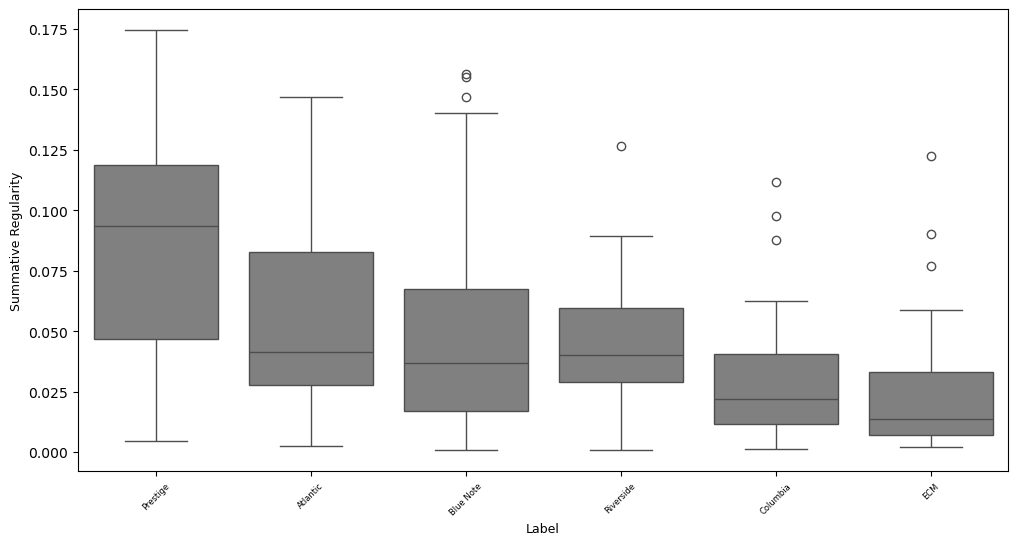

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=labeldf, x='label', y='song_score', color = "grey", order=label_order)

plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Summative Regularity', fontsize=9)
plt.xlabel('Label', fontsize=9)

plt.savefig("figures/boxplot_label.png", bbox_inches='tight', dpi=300)
plt.show()

In [62]:
lab_dunn = posthoc_dunn(labeldf, "song_score", "label", "bonferroni")
lab_dunn

,Atlantic,Blue Note,Columbia,ECM,Prestige,Riverside
Atlantic,1.000000,1.000000,0.613280,0.221882,0.804683,1.00000
Blue Note,1.000000,1.000000,1.000000,0.381091,0.001842,1.00000
Columbia,0.613280,1.000000,1.000000,1.000000,0.000248,1.00000
ECM,0.221882,0.381091,1.000000,1.000000,0.000044,1.00000
Prestige,0.804683,0.001842,0.000248,0.000044,1.000000,0.16356
Riverside,1.000000,1.000000,1.000000,1.000000,0.163560,1.00000


#### Label cosine regularity

In [63]:
cos_labeldf = pd.DataFrame({"label":labandcos.values(), "song_score":labandcos.keys()})
groups = cos_labeldf.groupby("label").groups

Atlantic = [cos_labeldf.loc[i].at["song_score"] for i in groups["Atlantic"]]
Bluenote = [cos_labeldf.loc[i].at["song_score"] for i in groups["Blue Note"]]
Columbia = [cos_labeldf.loc[i].at["song_score"] for i in groups["Columbia"]]
ECM = [cos_labeldf.loc[i].at["song_score"] for i in groups["ECM"]]
Prestige = [cos_labeldf.loc[i].at["song_score"] for i in groups["Prestige"]]
Riverside = [cos_labeldf.loc[i].at["song_score"] for i in groups["Riverside"]]

print(f_oneway(Atlantic, Bluenote, Columbia, ECM, Prestige, Riverside))
print(kruskal(Atlantic, Bluenote, Columbia, ECM, Prestige, Riverside))

F_onewayResult(statistic=np.float64(0.29584985605325115), pvalue=np.float64(0.9148116834675116))
KruskalResult(statistic=np.float64(2.151265234368225), pvalue=np.float64(0.8278434406684376))


In [64]:
label_order = (cos_labeldf.groupby('label')['song_score'].mean().sort_values(ascending=False).index)

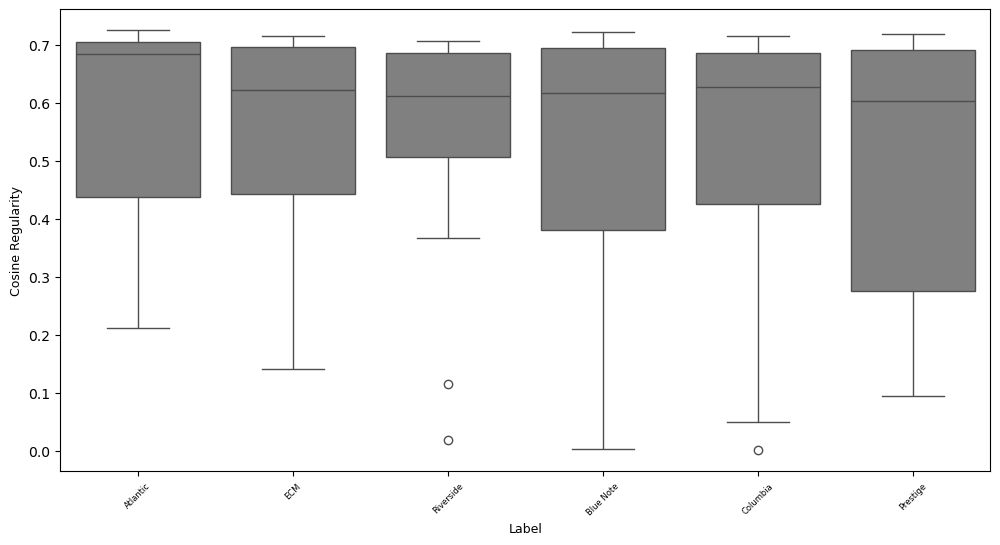

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cos_labeldf, x='label', y='song_score', color = "grey", order=label_order)

plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Cosine Regularity', fontsize=9)
plt.xlabel('Label', fontsize=9)

plt.savefig("figures/boxplot_label_cos.png", bbox_inches='tight', dpi=300)
plt.show()

In [66]:
cos_lab_dunn = posthoc_dunn(cos_labeldf, "song_score", "label", "bonferroni")
cos_lab_dunn

,Atlantic,Blue Note,Columbia,ECM,Prestige,Riverside
Atlantic,1.0,1.0,1.0,1.0,1.0,1.0
Blue Note,1.0,1.0,1.0,1.0,1.0,1.0
Columbia,1.0,1.0,1.0,1.0,1.0,1.0
ECM,1.0,1.0,1.0,1.0,1.0,1.0
Prestige,1.0,1.0,1.0,1.0,1.0,1.0
Riverside,1.0,1.0,1.0,1.0,1.0,1.0


#### Label pca

In [67]:
# Subselection of only mapped points
pca_subset_labels = [tuple(X_pca_2c[i]) for i in index_label.keys()]
pca_subset_labels = np.array(pca_subset_labels)

In [68]:
labels4 = np.array(list(index_label.values()))
unique_labels4 = np.unique(labels4)

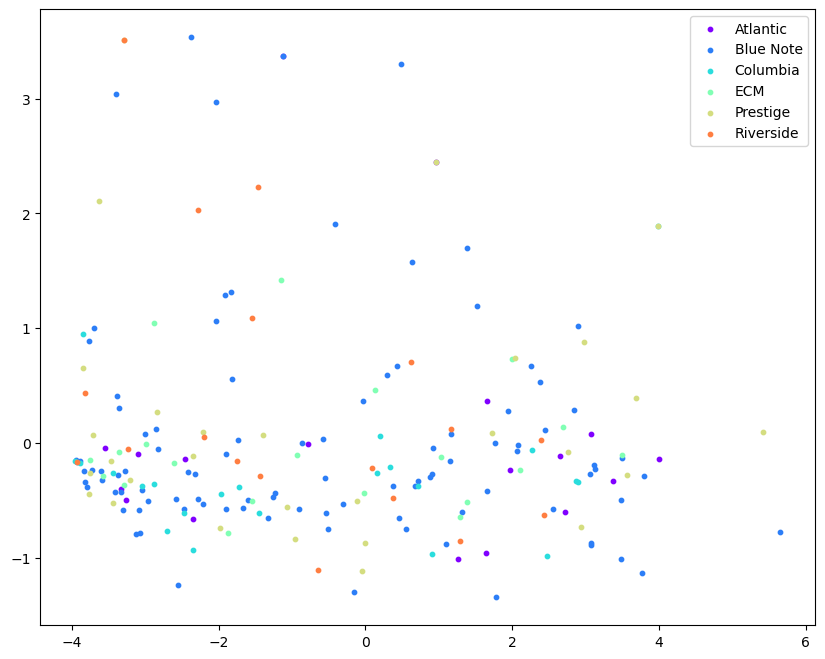

In [69]:
plt.figure(figsize=(10, 8))

colors4= [plt.colormaps["rainbow"](i / len(unique_labels4)) for i in range(len(unique_labels4))]

for i, label in enumerate(unique_labels4):
    idx = labels4 == label
    plt.scatter(pca_subset_labels[idx, 0], pca_subset_labels[idx, 1], s=10, color=colors4[i], label=str(label))

handles, labels4 = plt.gca().get_legend_handles_labels()
order = range(6)
plt.legend([handles[i] for i in order], [labels4[i] for i in order], bbox_to_anchor=(1, 1))

plt.savefig("figures/pca_label.png", bbox_inches='tight', dpi=300)
plt.show()

### K-means

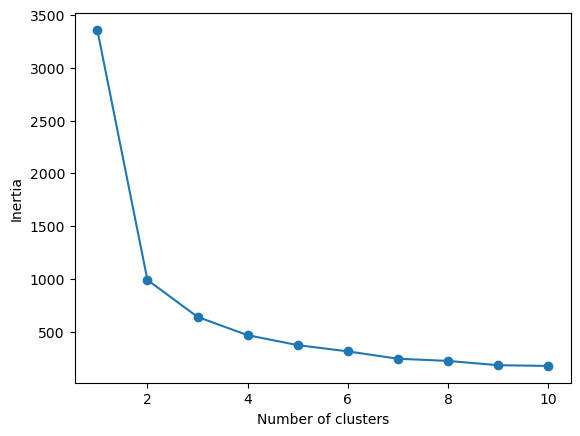

In [70]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_subset_composers)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [71]:
kmeans = KMeans(2) # Determining number of clusters
identified_clusters = kmeans.fit_predict(pca_subset_composers) # Clustering data

In [72]:
period_x = [t[0] for t in list(pca_subset_composers)]
period_y = [t[1] for t in list(pca_subset_composers)]

"""df_c = pd.DataFrame()
df_c["Name"] = year_d.keys()
df_c["C"] = identified_clusters
df_c["X"] = period_x
df_c["Y"] = period_y

df_c.head()"""

'df_c = pd.DataFrame()\ndf_c["Name"] = year_d.keys()\ndf_c["C"] = identified_clusters\ndf_c["X"] = period_x\ndf_c["Y"] = period_y\n\ndf_c.head()'

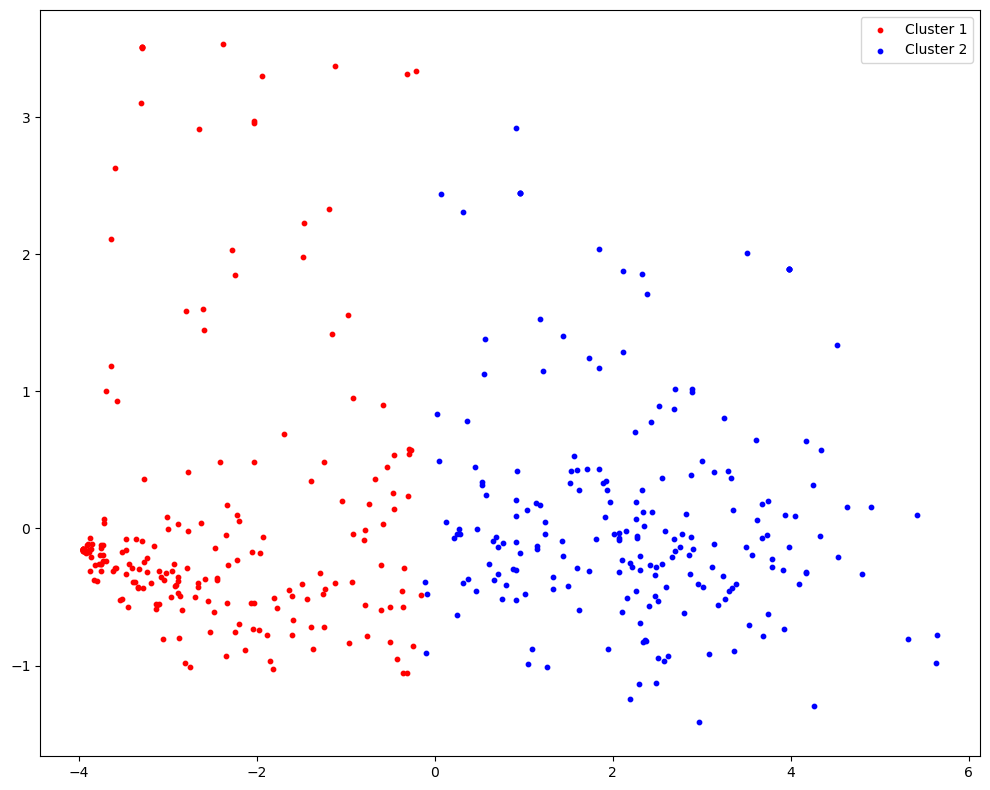

In [73]:
kmeans_colors = ['red', 'blue', 'green', 'orange', 'purple']
unique_clusters = np.unique(identified_clusters)

plt.figure(figsize=(10, 8))

for i, cluster_id in enumerate(unique_clusters):
    mask = identified_clusters == cluster_id
    plt.scatter(pca_subset_composers[mask, 0], pca_subset_composers[mask, 1], s=10, color=kmeans_colors[i], label=f'Cluster {cluster_id+1}')

plt.tight_layout()
plt.legend()
plt.savefig("figures/pca_kmeans2_composer_subset.png", bbox_inches='tight', dpi=300)
plt.show()

### Hierarchical clustering

In [113]:
Z = linkage(df, 'ward')
Z[:, 2] = Z[:, 2] * 0.05
cophenet(Z)

array([1.63107616, 0.46877761, 2.90047343, ..., 5.63655896, 5.63655896,
       0.59940683])

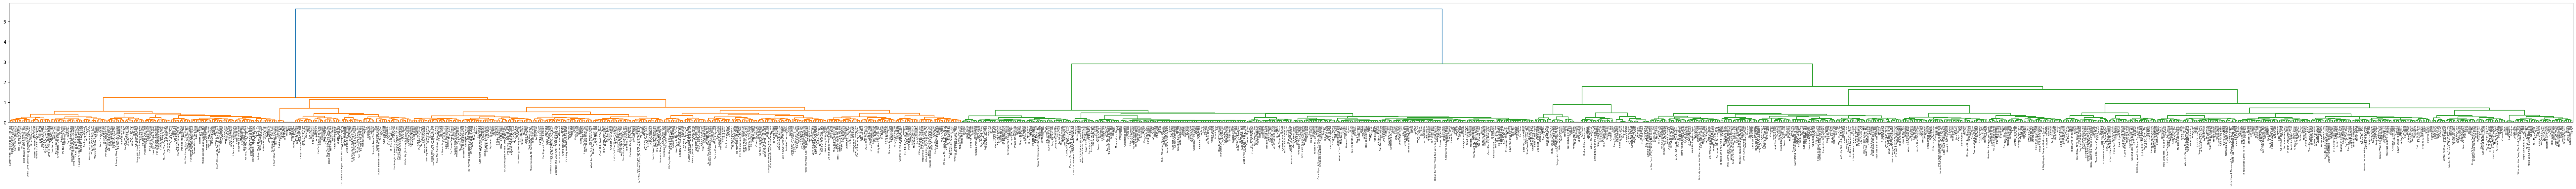

In [122]:
plt.figure(figsize=(100,20))
dendrogram(Z, labels = df.columns)
plt.subplots_adjust(bottom=0.7)
#plt.tight_layout()
plt.savefig("figures/dendrogram1.png", bbox_inches='tight', dpi = 200)
plt.show()

In [139]:
# trunkate
cluster_assignments = fcluster(Z, t=4, criterion='maxclust')

labels = list(df.columns)

cluster1_labels = [label for label, cluster in zip(labels, cluster_assignments) if cluster == 1]
cluster2_labels = [label for label, cluster in zip(labels, cluster_assignments) if cluster == 2]
cluster3_labels = [label for label, cluster in zip(labels, cluster_assignments) if cluster == 3]
cluster4_labels = [label for label, cluster in zip(labels, cluster_assignments) if cluster == 4]

In [140]:
# subset and relink
df1 = df[cluster1_labels]
df2 = df[cluster2_labels]
df3 = df[cluster3_labels]
df4 = df[cluster4_labels]

Z1 = linkage(df1.T, method='ward')
Z2 = linkage(df2.T, method='ward')
Z3 = linkage(df3.T, method='ward')
Z4 = linkage(df4.T, method='ward')

In [147]:
# plot cluster 1
plt.figure(figsize=(200, 180))
dendrogram(Z1, labels=df1.columns, leaf_rotation=90, leaf_font_size=22)
plt.subplots_adjust(bottom=0.5)
plt.savefig("figures/dendrogram_cluster1.png", bbox_inches='tight')
plt.close()

# plot cluster 2
plt.figure(figsize=(200, 180))
dendrogram(Z2, labels=df2.columns, leaf_rotation=90, leaf_font_size=22)
plt.subplots_adjust(bottom=0.5)
plt.savefig("figures/dendrogram_cluster2.png", bbox_inches='tight')
plt.close()

# plot cluster 3
plt.figure(figsize=(200, 180))
dendrogram(Z3, labels=df3.columns, leaf_rotation=90, leaf_font_size=22)
plt.subplots_adjust(bottom=0.5)
plt.savefig("figures/dendrogram_cluster3.png", bbox_inches='tight')
plt.close()

# plot cluster 4
plt.figure(figsize=(200, 180))
dendrogram(Z4, labels=df4.columns, leaf_rotation=90, leaf_font_size=22)
plt.subplots_adjust(bottom=0.5)
plt.savefig("figures/dendrogram_cluster4.png", bbox_inches='tight')
plt.close()

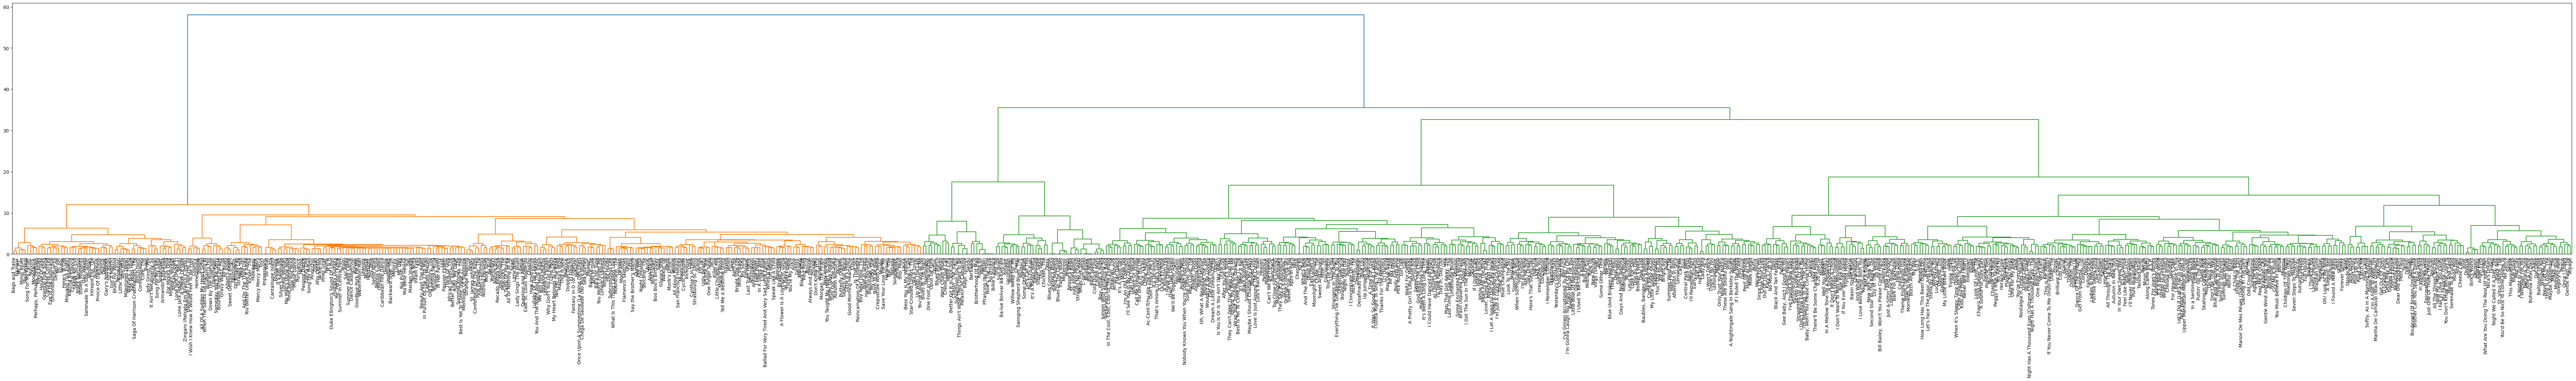

In [130]:
# plot cluster 2
plt.figure(figsize=(200, 120))
dendrogram(Z2, labels=df2.columns, leaf_rotation=90, leaf_font_size=13)
plt.subplots_adjust(bottom=0.5)
plt.savefig("figures/dendrogram_cluster2.png", bbox_inches='tight', dpi=200)
plt.show()